In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
df = pd.read_table("Taxonomic-Binning/tax.summary.all.tab", header=0, index_col=0)
mapping_file = pd.read_table("mapping_file.tab", header=0, index_col=0)

In [22]:
class plot_taxa(object): 
    def __init__(self, df):
        self.df = df         
    def select_taxonomic_rank(self, identifier, col_or_row, metadata=False):
        """Select taxonomic level at which to filter the dataframe by. 
           Usage: df=dataframe to filter, identifier=shorthand for taxonomic level e.g. 'p__',
           col_row=whether to filter by columns or rows, metadata=include metadata variables """
        meta = df.select_dtypes(exclude=['float64'])
        if col_or_row == "row":
            if not metadata:
                filtered = df[df.index.str.contains(identifier)]
                return filtered
            elif metadata == True:
                filtered = df[df.index.str.contains(identifier)]
                merged = pd.concat([meta, filtered], axis=0)
        elif col_or_row == "column":
            if not self.metadata:
                filtered = df.filter(regex=identifier, axis=1)
                return filtered
            elif metadata == True:
                filtered = df.filter(regex=identifier, axis=1)
                merged = pd.concat([meta, filtered], axis=1)
                return merged

    def select_subset(self, col, subset, col_2=None, subset2=None):
        col = col
        subset = subset
        col_2 = col_2
        subset2 = subset2  
        if not subset2:
            df_subset = df[df[self.col] == subset]
            df_subset = df_subset.select_dtypes(exclude=['object'])
            return df_subset
        elif subset2: 
            df_subset = df[df[self.col] == subset]
            df_subset_2 = df[df[self.col_2] == subset2]
            df_subset_2 = df_subset.select_dtypes(exclude=['object'])
            return df_subset_2
    
    def plot_stacked_bar(self, T=None):
        if not T: 
            sns.set()
            return df.plot(kind='bar', stacked=True, figsize=(15,8), legend=True, grid=False, width=0.75)
        elif T: 
            sns.set()
            return df.plot(kind='bar', stacked=True, figsize=(15,8), legend=True, grid=False, width=0.75)

    def calc_plot_means(self, df_type, col=None, identifier=None, col_or_row=None):
        if  df_type == "df":
            mean = df.mean()
            sns.set()
            return mean.plot(kind='pie', legend=True, grid=False, width=0.75)
        elif df_type == "df_metadata":
            taxonomic_level = select_taxonomic_rank(df, identifier, col_or_row, metadata=True)
            if col:
                mean = taxonomic_level.groupby(col).mean()
                return mean.plot(kind='bar', stacked=True, legend=True, grid=False, width=0.75) 
                #print(len(df[col].unique()))           

In [19]:
phylum = plot_taxa.select_taxonomic_rank(df, "p__", "row")
family = plot_taxa.select_taxonomic_rank(df, "f__", "row")
genus = plot_taxa.select_taxonomic_rank(df, "g__", "row")

In [54]:
df_T = df.T
merged = pd.concat([mapping_file, df_T], axis=1)

In [9]:
wk_5 = select_subset(merged, "Age", "5wk", "Genotype", "tg/tg")
wk_5_phylum = select_taxonomic_rank(wk_5, "p__", "column")

In [10]:
#def subset_taxa_abundance()
wk_5_phylum

,p__Actinobacteria,p__Bacteroidetes,p__Candidatus Saccharibacteria,p__Cyanobacteria/Chloroplast,p__Deferribacteres,p__Firmicutes,p__Proteobacteria,p__Tenericutes,p__unknown_ Bacteria,p__Verrucomicrobia
01.AV967,0.233623,16.697711,0.476717,0.003157,3.753749,76.170481,1.528019,0.883978,0.249408,0.003157
02.AV968,0.055794,10.889909,0.284040,0.000000,9.134945,78.004616,0.928204,0.654308,0.048185,0.000000
03.AV971,0.262543,4.786909,0.751663,0.000000,5.409099,86.423305,1.729905,0.618594,0.014386,0.003596
04.AV972,0.073460,20.015217,0.695246,0.000000,3.728093,72.507608,1.477070,1.361633,0.139049,0.002624
05.AV974,0.059183,9.051230,0.388385,0.000000,3.573146,85.307934,1.031996,0.573331,0.000000,0.014796
06.AV996,0.032566,5.669717,0.182369,0.000000,4.200997,88.826652,0.674113,0.367994,0.045592,0.000000
08.AV583,0.100358,12.354063,0.227478,0.000000,0.093667,85.404610,1.575620,0.016726,0.003345,0.224133
09.AV584,0.043940,16.321909,0.415737,0.000000,0.878794,80.416413,0.807815,0.844994,0.270398,0.000000
10.AV587,0.133007,18.424921,0.560028,0.000000,4.952748,73.115156,1.494575,0.661533,0.658033,0.000000
11.AV588,0.055052,14.928756,1.065415,0.000000,1.343912,80.158679,1.311528,0.272021,0.861399,0.003238


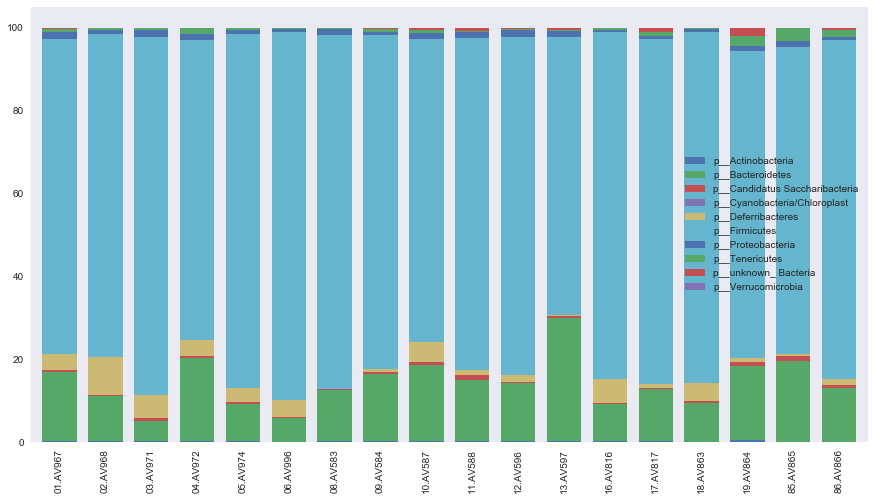

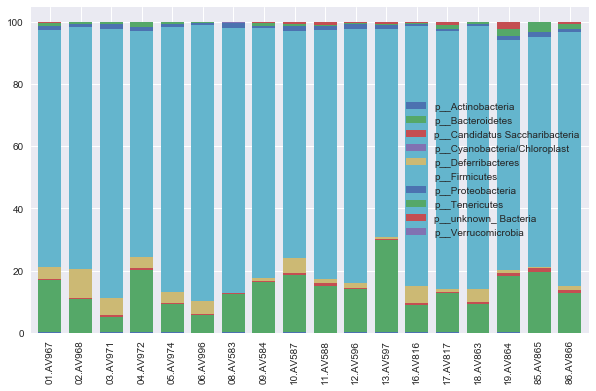

In [123]:
plot_stacked_bar(wk_5_phylum)
wk_5_phylum.plot(kind='area', figsize=(15,8))

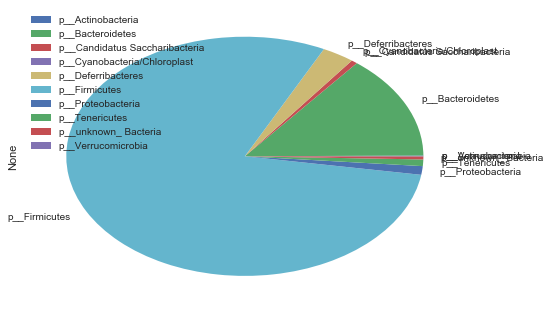

In [55]:

calc_plot_means(wk_5_phylum, "df")   # add code to plot stacked bar by sample metadata (use functions above)

In [38]:
merged.groupby("Phenotype").mean() # maybe optional return of df with metadata for comparing means of different groups

,k__Bacteria,p__Actinobacteria,p__Bacteroidetes,p__Candidatus Saccharibacteria,p__Cyanobacteria/Chloroplast,p__Deferribacteres,p__Firmicutes,p__Proteobacteria,p__Tenericutes,p__unknown_ Bacteria,...,g__unknown_ Erysipelotrichaceae,g__unknown_ Firmicutes,g__unknown_ Lachnospiraceae,g__unknown_ Nocardioidaceae,g__unknown_ Peptostreptococcaceae,g__unknown_ Porphyromonadaceae,g__unknown_ Ruminococcaceae,g__unknown_ Staphylococcaceae,g__Vampirovibrio,g__Vibrio
Phenotype,,,,,,,,,,,,,,,,,,,,,
NT,100.0,0.084477,15.791355,0.354099,0.000555,2.662587,78.539983,1.365521,0.680234,0.512140,...,0.103558,0.464926,50.148537,0.000149,0.012805,7.336647,4.438328,0.0,0.231865,0.0
T,100.0,0.204500,22.790357,0.871573,0.000000,1.810445,69.436842,3.461387,0.385275,1.039622,...,0.309363,0.438479,32.651833,0.000000,0.499221,8.551091,3.894138,0.0,0.431783,0.0


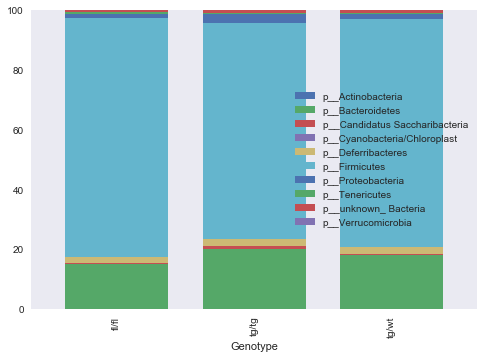

In [128]:
calc_plot_means(merged, df_type="df_metadata", col="Genotype", identifier="p__", col_or_row="column")